## Plotting - Seaborn
Home exercises. Note that you may need to also use pandas to answer some of the questions.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Student Name': ['Amelie', 'Edgar', 'Jordi', 'Marçal', 'Pep', 'Jaume', 'Marco',
                     'Ludmila', 'Bastian', 'Marc', 'Gerardo', 'Javier', 'Frank', 'Julia'],
    'Course': ['Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision',
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision',
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision',
               'Artificial Intelligence', 'Python for Data Science'],
    'Grade': [85, 92, 78, 88, 91, 84, 73, 95, 90, 80, 85, 87, 89, 92],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female'],
    'Study Time': [15, 20, 10, 8, 18, 14, 11, 16, 19, 13, 16, 12, 17, 15],
    'Age': [22, 21, 23, 22, 20, 24, 22, 21, 23, 21, 22, 22, 21, 20]
}

df = pd.DataFrame(data)
df.head(5)

,Student Name,Course,Grade,Gender,Study Time,Age
0,Amelie,Artificial Intelligence,85,Female,15,22
1,Edgar,Python for Data Science,92,Male,20,21
2,Jordi,Cloud Computing,78,Male,10,23
3,Marçal,Computer Vision,88,Male,8,22
4,Pep,Artificial Intelligence,91,Male,18,20


1. Create a *lineplot* showing how **Study Time** varies by **Student Name**. Which student has the highest study time?

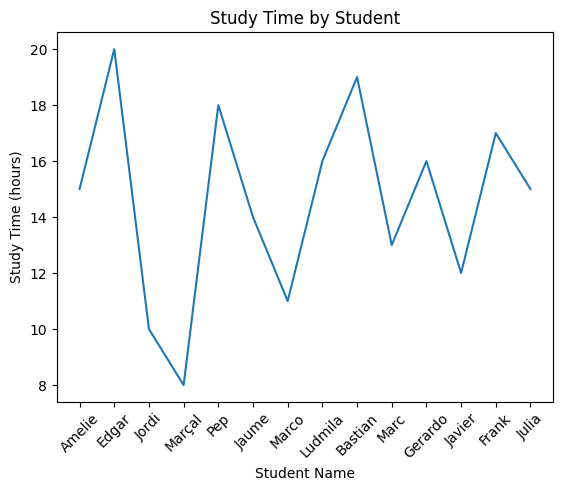

The student with the highest study time is Edgar with 20 hours.


In [55]:
# create plot
plt.plot(df['Student Name'], df['Study Time'])

plt.xlabel('Student Name')
plt.xticks(rotation=45)

plt.ylabel('Study Time (hours)')

plt.title('Study Time by Student')
plt.show()

# find student with highest study time
max_name, max_time = df[['Student Name', 'Study Time']].sort_values('Study Time', ascending=False).iloc[0]
print(f'The student with the highest study time is {max_name} with {max_time} hours.')

2. Plot a histogram (*histplot*) of **Grade** and determine which grade range has the highest frequency of students.

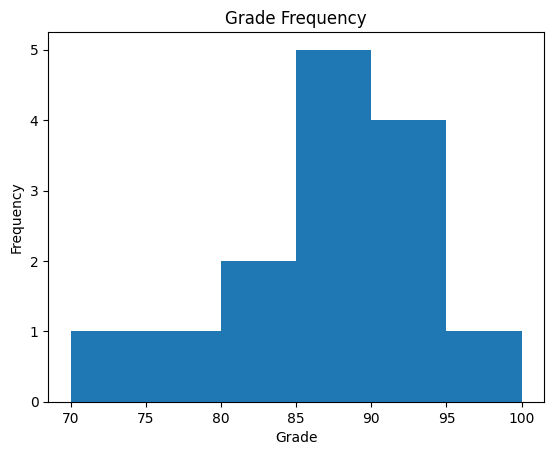

The most common grade range is 85 to 90.


In [56]:
# create histogram
bins = [70, 75, 80, 85, 90, 95, 100]
plt.hist(df['Grade'], bins=bins)

plt.xlabel('Grade')
plt.xticks(bins)

plt.ylabel('Frequency')

plt.title('Grade Frequency')
plt.show()

# find most common grade range
df['Grade Range'] = pd.cut(df['Grade'], bins=bins)
interval = df['Grade Range'].value_counts().idxmax()
print(f'The most common grade range is {interval.left} to {interval.right}.')

3. Create an ECDF plot (*ecdfplot*) for **Grade**. What is the percentage of students scoring less than 85?

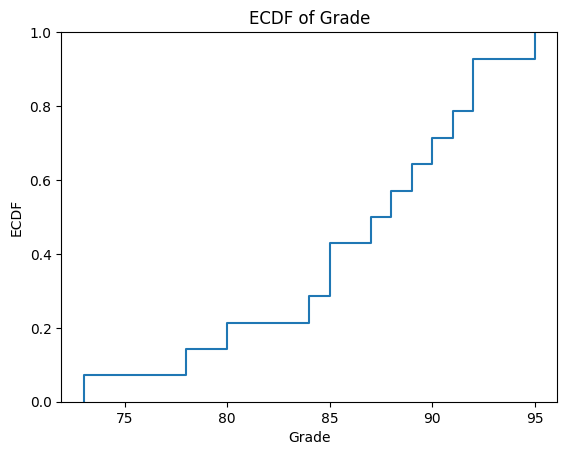

The percentage of students scoring less than 85 is 29%.


In [57]:
# create ECDF plot
plt.ecdf(df['Grade'])

plt.xlabel('Grade')
plt.ylabel('ECDF')

plt.title('ECDF of Grade')
plt.show()

# find percentage of students scoring less than 85
ratio = df[df['Grade'] < 85].shape[0] / df.shape[0]
print(f'The percentage of students scoring less than 85 is {ratio:.0%}.')

4. Create a *stripplot* showing **Grade** distribution for each **Course**. Which course has the most spread in grades?

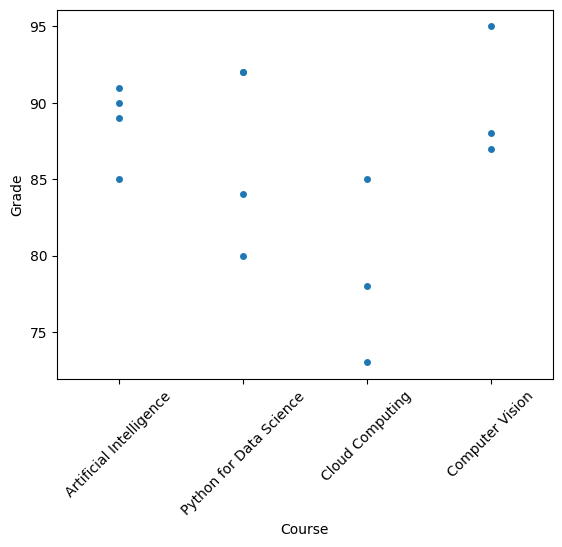

The courses with the most spread in grades are Cloud Computing, Python for Data Science with a spread of 12.


In [58]:
# create stripplot
sns.stripplot(x='Course', y='Grade', data=df, jitter=False)

plt.xticks(rotation=45)

plt.show()

# find course with most spread in grades
course_grades = df.groupby('Course')['Grade']
course_ranges = course_grades.max() - course_grades.min()
course_max_spread = course_ranges[course_ranges == course_ranges.max()]
print(f'The courses with the most spread in grades are {", ".join(course_max_spread.index)} with a spread of {course_max_spread.values[0]}.')

5. Create a *swarmplot* to show the relationship between Gender and **Study Time**. Which gender has a higher average study time?

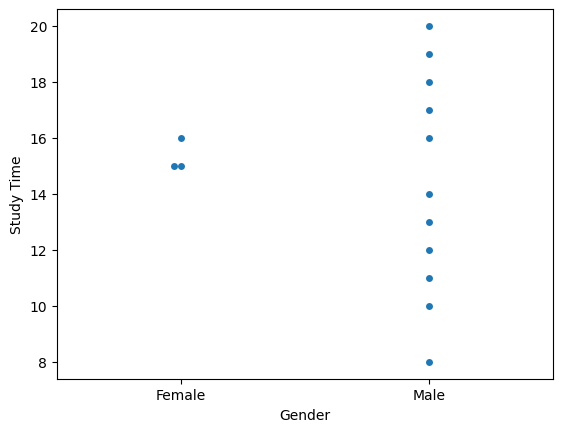

The gender with the higher average study time is Female with 15.333333333333334 hours.


In [59]:
# create swarmplot
sns.swarmplot(x='Gender', y='Study Time', data=df)

plt.show()

# find gender with higher average study time
avg_time = df.groupby('Gender')['Study Time'].mean()
max_time = avg_time[avg_time == avg_time.max()]
print(f'The gender with the higher average study time is {max_time.index[0]} with {max_time.values[0]} hours.')

6. Plot a *pointplot* to show the average **Grade** for each Course. Which course has the highest average grade?

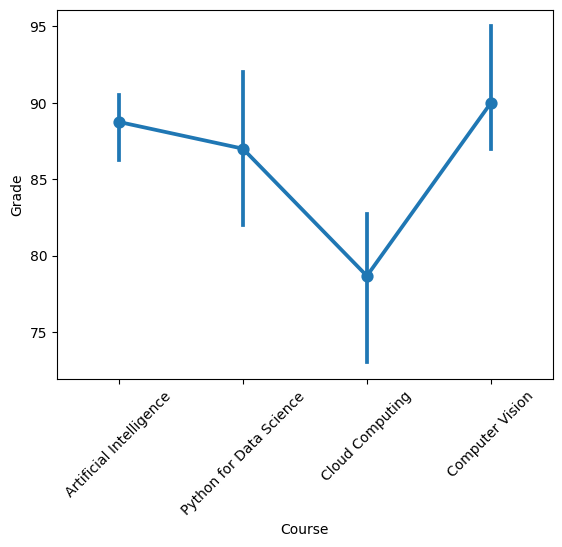

The course with the highest average grade is Computer Vision with an average grade of 90.0.


In [60]:
# create pointplot
sns.pointplot(x='Course', y='Grade', data=df)

plt.xticks(rotation=45)

plt.show()

# find course with highest average grade
avg_grade = df.groupby('Course')['Grade'].mean()
max_grade = avg_grade[avg_grade == avg_grade.max()]
print(f'The course with the highest average grade is {max_grade.index[0]} with an average grade of {max_grade.values[0]}.')